In [1]:
"""
General workflow for importing a new session
"""
subject = 'P09' # TODO: change this for each subject
verbose = True  # change this for debugging

import matplotlib
%matplotlib inline

from deepthought.datasets.openmiir.preprocessing.pipeline import Pipeline
settings = dict(debug=False, mne_log_level='Info', sfreq=64) # optional pipeline settings
pipeline = Pipeline(subject, settings)

Couldn't import dot_parser, loading of dot files will not be possible.


Using gpu device 0: Tesla C2075


# Import or Load Raw

In [39]:
pipeline.import_and_process_metadata(verbose=verbose)
pipeline.load_raw(verbose=verbose)

Importing raw BDF data from: /imaging/deepthought/datasets/mpi2015/eeg/biosemi/P09.bdf
Extracting edf Parameters from /imaging/deepthought/datasets/mpi2015/eeg/biosemi/P09.bdf...
Setting channel info structure...
Creating Raw.info structure...
Reading raw data from /imaging/deepthought/datasets/mpi2015/eeg/biosemi/P09.bdf...
Reading 0 ... 2544639  =      0.000 ...  4969.998 secs...
[done]
    Range : 0 ... 2544639 =      0.000 ...  4969.998 secs
Ready.
Imported raw data: <RawEDF  |  'P09.bdf', n_channels x n_times : 80 x 2544640>
Marked unused channels as bad: [u'C1', u'C2', u'C3', u'C4', u'C5', u'C6', u'C7', u'C8', u'C9', u'C10', u'C11', u'C12', u'C13', u'C14', u'C15', u'C16', u'C17', u'C18', u'C19', u'C20', u'C21', u'C22', u'C23', u'C24', u'C25', u'C26', u'C27', u'C28', u'C29', u'C30', u'C31', u'C32', u'D1', u'D2', u'D3', u'D4', u'D5', u'D6', u'D7', u'D8', u'D9', u'D10', u'D11', u'D12', u'D13', u'D14', u'D15', u'D16', u'D17', u'D18', u'D19', u'D20', u'D21', u'D22', u'D23', u'D24', u'

WARNING (deepthought.datasets.mpi2015.preprocessing.keystrokes): No key mapping defined for P09. Using default mapping.
WARNING (deepthought.datasets.mpi2015.events): unsupported type: start time
WARNING (deepthought.datasets.mpi2015.events): unsupported type: end time


keystroke keys: set([u'LeftArrow', u'RightArrow']) mapping: {u'RightArrow': 1, u'LeftArrow': 0}
Cropping raw inplace to 175.627s - 4942.336s
Saving raw fif data to: /imaging/deepthought/datasets/mpi2015/eeg/mne/P09-raw.fif
Loading raw fif data from: /imaging/deepthought/datasets/mpi2015/eeg/mne/P09-raw.fif
Opening raw data file /imaging/deepthought/datasets/mpi2015/eeg/mne/P09-raw.fif...
Isotrak not found
    Range : 0 ... 2440555 =      0.000 ...  4766.709 secs
Ready.
Adding average EEG reference projection.
1 projection items deactivated
Reading 0 ... 2440555  =      0.000 ...  4766.709 secs...
[done]
Applying channel montage: <Montage | 64channels - 64 Channels: Fp1, AF7, AF3 ...>
Saving raw fif data to: /imaging/deepthought/datasets/mpi2015/eeg/mne/P09-raw.fif
Imported <Raw  |  n_channels x n_times : 71 x 2440556>
Metadata: <Info | 18 non-empty fields
    bads : list | 0 items
    buffer_size_sec : numpy.float64 | 10.0
    ch_names : list | Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, 

In [3]:
print pipeline.raw.info

<Info | 18 non-empty fields
    bads : list | 0 items
    buffer_size_sec : numpy.float64 | 10.0
    ch_names : list | Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3
    chs : list | 69 items (EEG: 64, STIM: 1, EOG: 4)
    comps : list | 0 items
    custom_ref_applied : bool | True
    events : list | 0 items
    file_id : dict | 4 items
    filename : str | /imaging/d.../P09-raw.fif
    highpass : float | 0.0
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 104.0
    meas_date : numpy.ndarray | 2015-02-25 12:18:34
    meas_id : dict | 4 items
    nchan : int | 69
    projs : list | 0 items
    sfreq : float | 512.0
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dev_head_t : NoneType
    dig : NoneType
    experimenter : NoneType
    hpi_subsystem : NoneType
    line_freq : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
>


# Reject Bad Channels

In [4]:
# switch to interactive GUI mode to scroll through data
%matplotlib tk 
pipeline.plot_raw();
pass

scroll using cursor keys, click on channels to mark as "bad"


In [5]:
# switch back to inline mode
%matplotlib inline

In [6]:
# pipeline.reset_bad_channels() # use this to reset the channel list if needed

In [7]:
# TODO: change these value manually
# If you would rather apply the bandpass filter first, continue until it is applied 
# and then come back to this cell
pipeline.mark_bad_channels(None, save_to_raw=False) # nothing to change, None will keep old values
# pipeline.mark_bad_channels(['P8', 'P10', 'T8'], save_to_raw=True)

The following channels have been marked as bad: []


In [8]:
pipeline.print_bad_channels()

bad channels: []


In [9]:
pipeline.interpolate_bad_channels() # Note: this will overwrite data

No bad channels that need to be interpolated.


# Check and Merge Trials

540 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1000 1111 2000 2001]
[[    512       0     121]
 [    522       0    1000]
 [   8193       0     122]
 ..., 
 [2422535       0    2001]
 [2430222       0     224]
 [2430315       0    2000]]


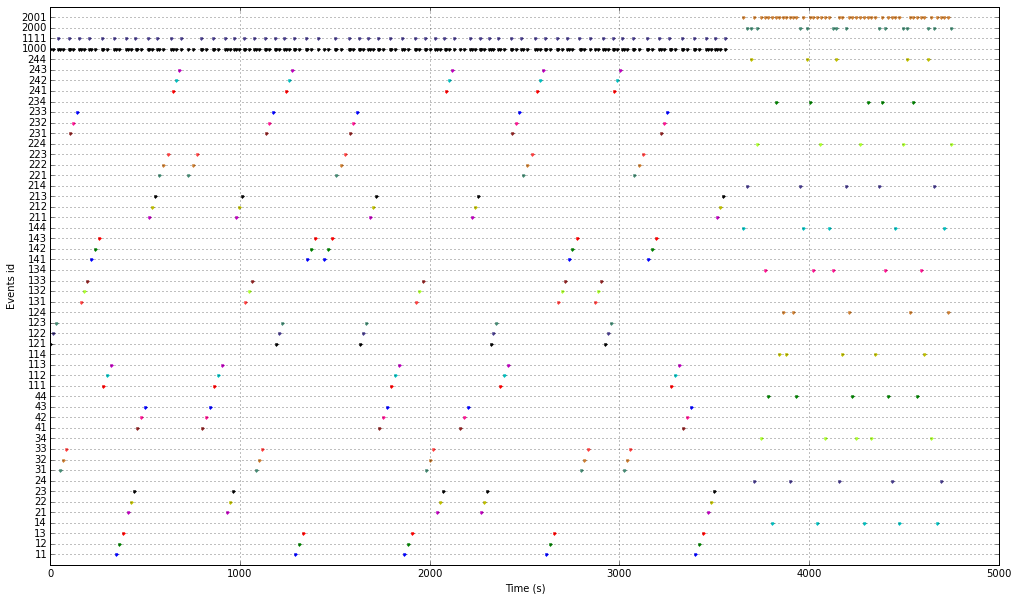

1st event at  [ 1.]
last event at  [ 4746.70898438]


In [40]:
pipeline.check_trial_events()

540 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1000 1111 2000 2001]


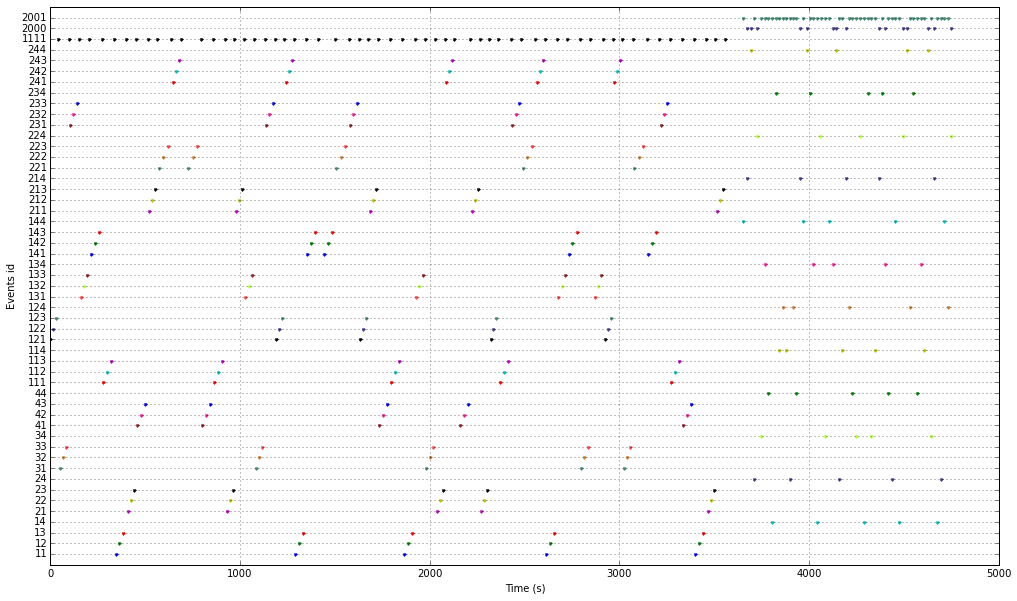

In [11]:
pipeline.check_trial_audio_onset_merge(use_audio_onsets=True, verbose=None)

In [12]:
pipeline.merge_trial_and_audio_onsets()

540 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1000 1111 2000 2001]
360 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1111 2000 2001]


# Check PSD and Channels

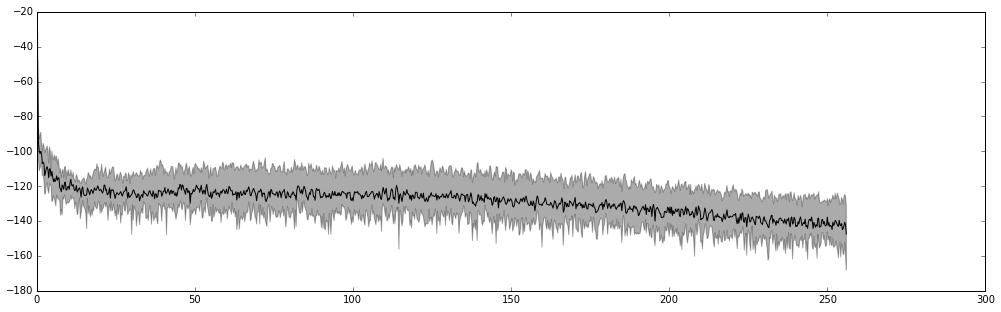

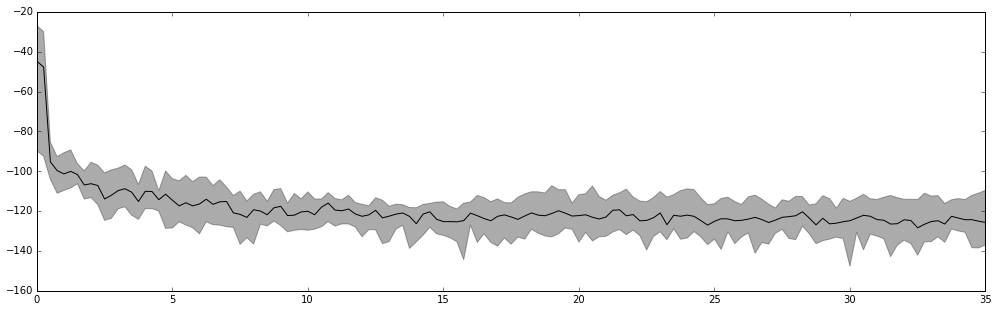

In [13]:
pipeline.check_psd()
pipeline.check_psd(fmax=35)
# line noise will probably be visible @ multiples of 60Hz

(2430828,)


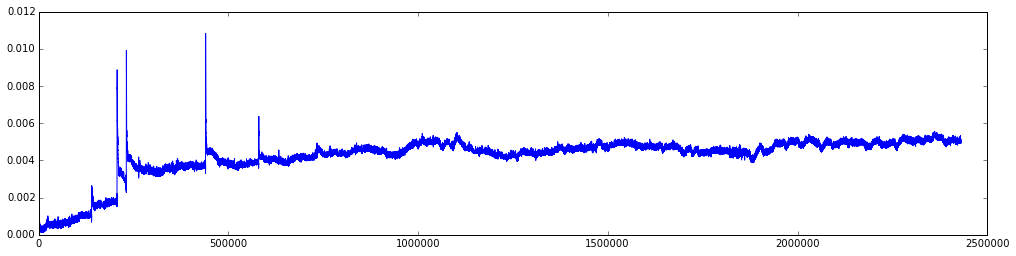

In [14]:
pipeline.check_channel(0)
# quite some drift and movement in the breaks

# Bandpass Filtering

In [42]:
pipeline.bandpass_filter()

Band-pass filtering from 0.5 - 30 Hz


[Parallel(n_jobs=4)]: Done   1 out of  64 | elapsed:    0.7s remaining:   43.4s
[Parallel(n_jobs=4)]: Done  14 out of  64 | elapsed:    2.7s remaining:    9.7s
[Parallel(n_jobs=4)]: Done  27 out of  64 | elapsed:    4.7s remaining:    6.5s
[Parallel(n_jobs=4)]: Done  40 out of  64 | elapsed:    6.8s remaining:    4.1s
[Parallel(n_jobs=4)]: Done  53 out of  64 | elapsed:    8.8s remaining:    1.8s
[Parallel(n_jobs=4)]: Done  64 out of  64 | elapsed:   10.4s finished


In [16]:
%matplotlib tk 
pipeline.plot_raw();
pass

scroll using cursor keys, click on channels to mark as "bad"


In [17]:
%matplotlib inline

(2430828,)


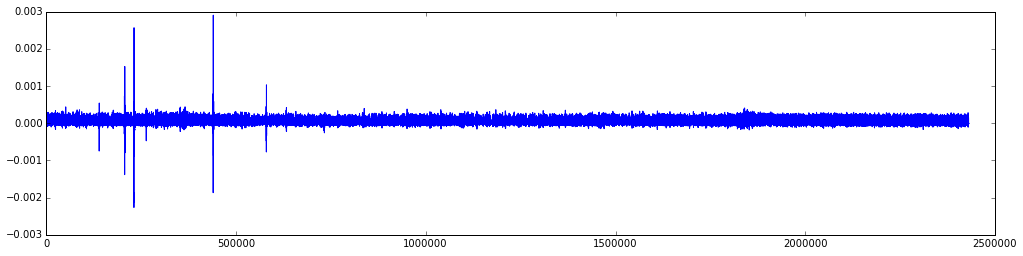

In [18]:
pipeline.check_channel(0)
# looks like we got rid of that drift - nice!
# what's that? eyeblinks?

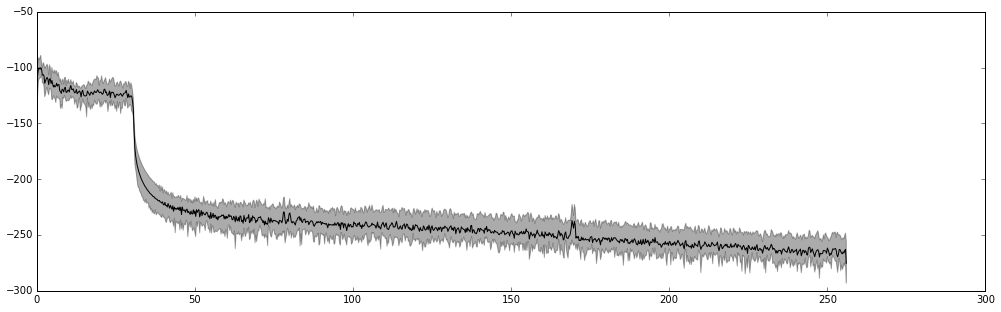

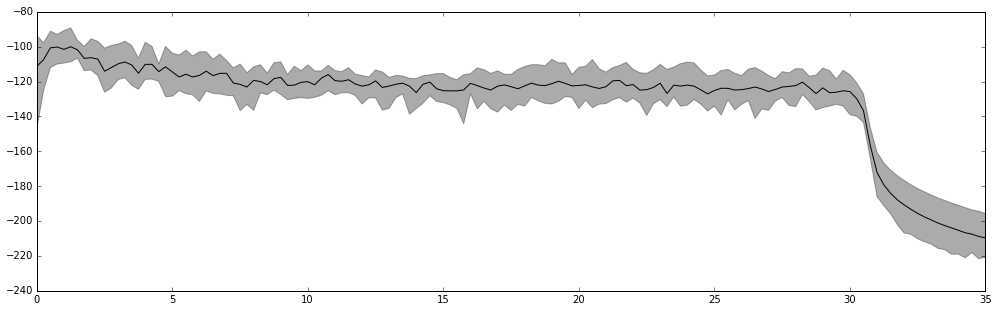

In [19]:
## check PSD again - after bandpass, before down-sampling
pipeline.check_psd()
pipeline.check_psd(fmax=35)
# 60Hz is still visible

# Beat and EOG Epoching

Loading stimulus metadata from /imaging/deepthought/datasets/mpi2015/meta/Stimuli_Meta.v2.xlsx
{1: 6, 2: 6, 3: 8, 4: 8, 11: 6, 12: 6, 13: 8, 14: 8, 21: 6, 22: 6, 23: 4, 24: 8}
<Epochs  |  n_events : 8140 (all good), tmin : -0.2 (s), tmax : 0.8 (s), baseline : (None, 0)>


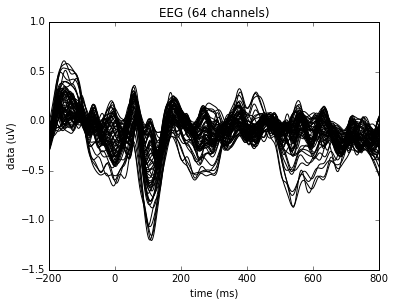

In [43]:
pipeline.generate_beat_events() # Note: this includes cue-beats !!!
pipeline.beat_epochs.average().plot();

EOG channel index for this subject is: [64 65 66 67]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Now detecting blinks and generating corresponding events
Number of EOG events detected : 719


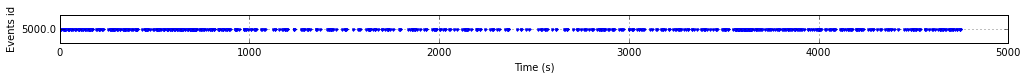

In [21]:
pipeline.find_eog_events()
# wow - that's a lot of blinking

# Down-Sampling

In [22]:
pipeline.downsample()


        from doc:
                up computations (e.g., projection calculation) when precise timing
                of events is not required, as downsampling raw data effectively
                jitters trigger timings. It is generally recommended not to epoch
                downsampled data, but instead epoch and then downsample, as epoching
                downsampled data jitters triggers.

        NOTE: event onset collisions will be reported as warnings
              in that case, it might be a good idea to pick either the trial onset or audio onset events
              and delete the other ones before downsampling
        
down-sampling raw and events stim channel ...
saving events for stim channel "STI 014" (#68)
360 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243

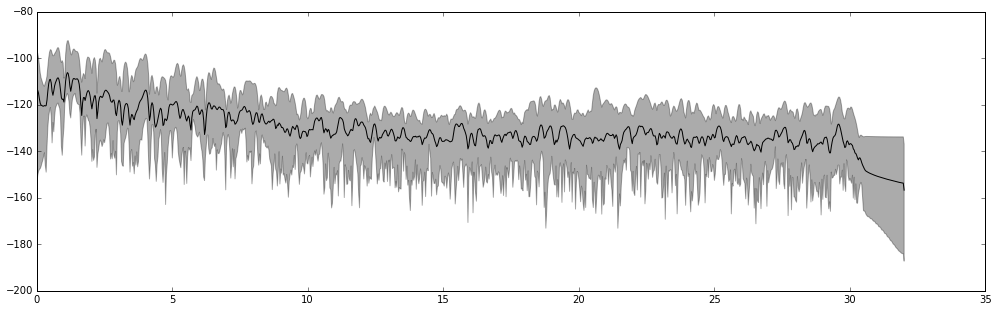

In [23]:
## PSD after down-sampling:
pipeline.check_psd(fmax=35)
# looks less smooth than without down-sampling

360 events found
Events id: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42   43
   44  111  112  113  114  121  122  123  124  131  132  133  134  141  142
  143  144  211  212  213  214  221  222  223  224  231  232  233  234  241
  242  243  244 1111 2000 2001]


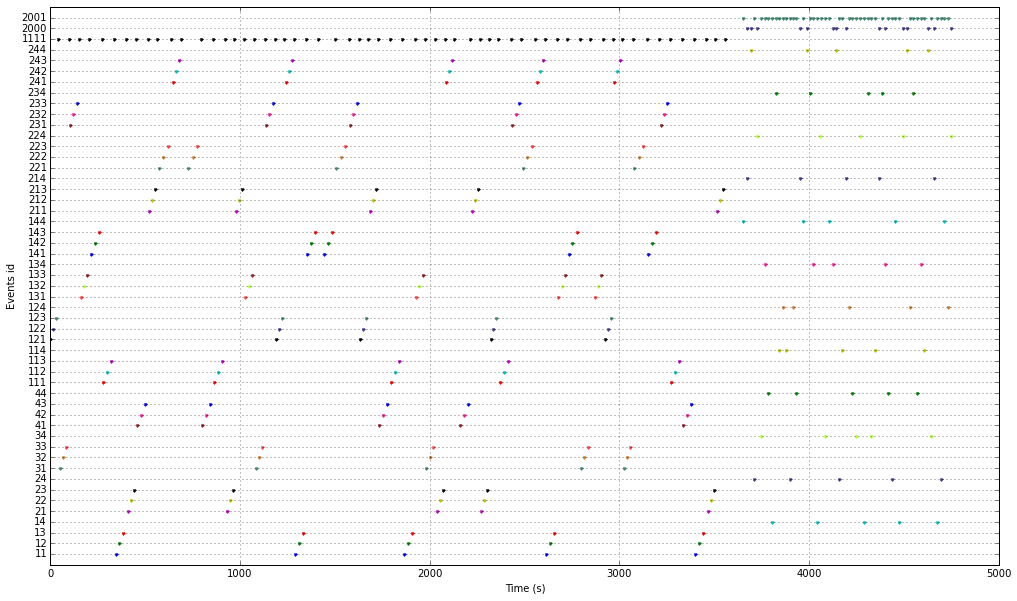

event onset jitter (min, mean, max): -0.013671875 -0.00724283854167 0.0


In [24]:
# check events after after resampling -> should get the same result as above
pipeline.check_resampled_trial_events(plot=True, verbose=False)

# ICA

In [25]:
pipeline.compute_ica(verbose=True)

Fitting ICA to data using 64 channels. 
Please be patient, this may take some time
Inferring max_pca_components from picks.
Selection by explained variance: 63 components
computing Extended Infomax ICA


/usr/local/lib/python2.7/dist-packages/matplotlib/colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")
/usr/local/lib/python2.7/dist-packages/mne-0.9.dev-py2.7.egg/mne/viz/utils.py:125: UserWarning: Matplotlib function 'tight_layout' is not supported by your backend: `module://IPython.kernel.zmq.pylab.backend_inline`. Skipping subpplot adjusment.
  warn(msg % case)


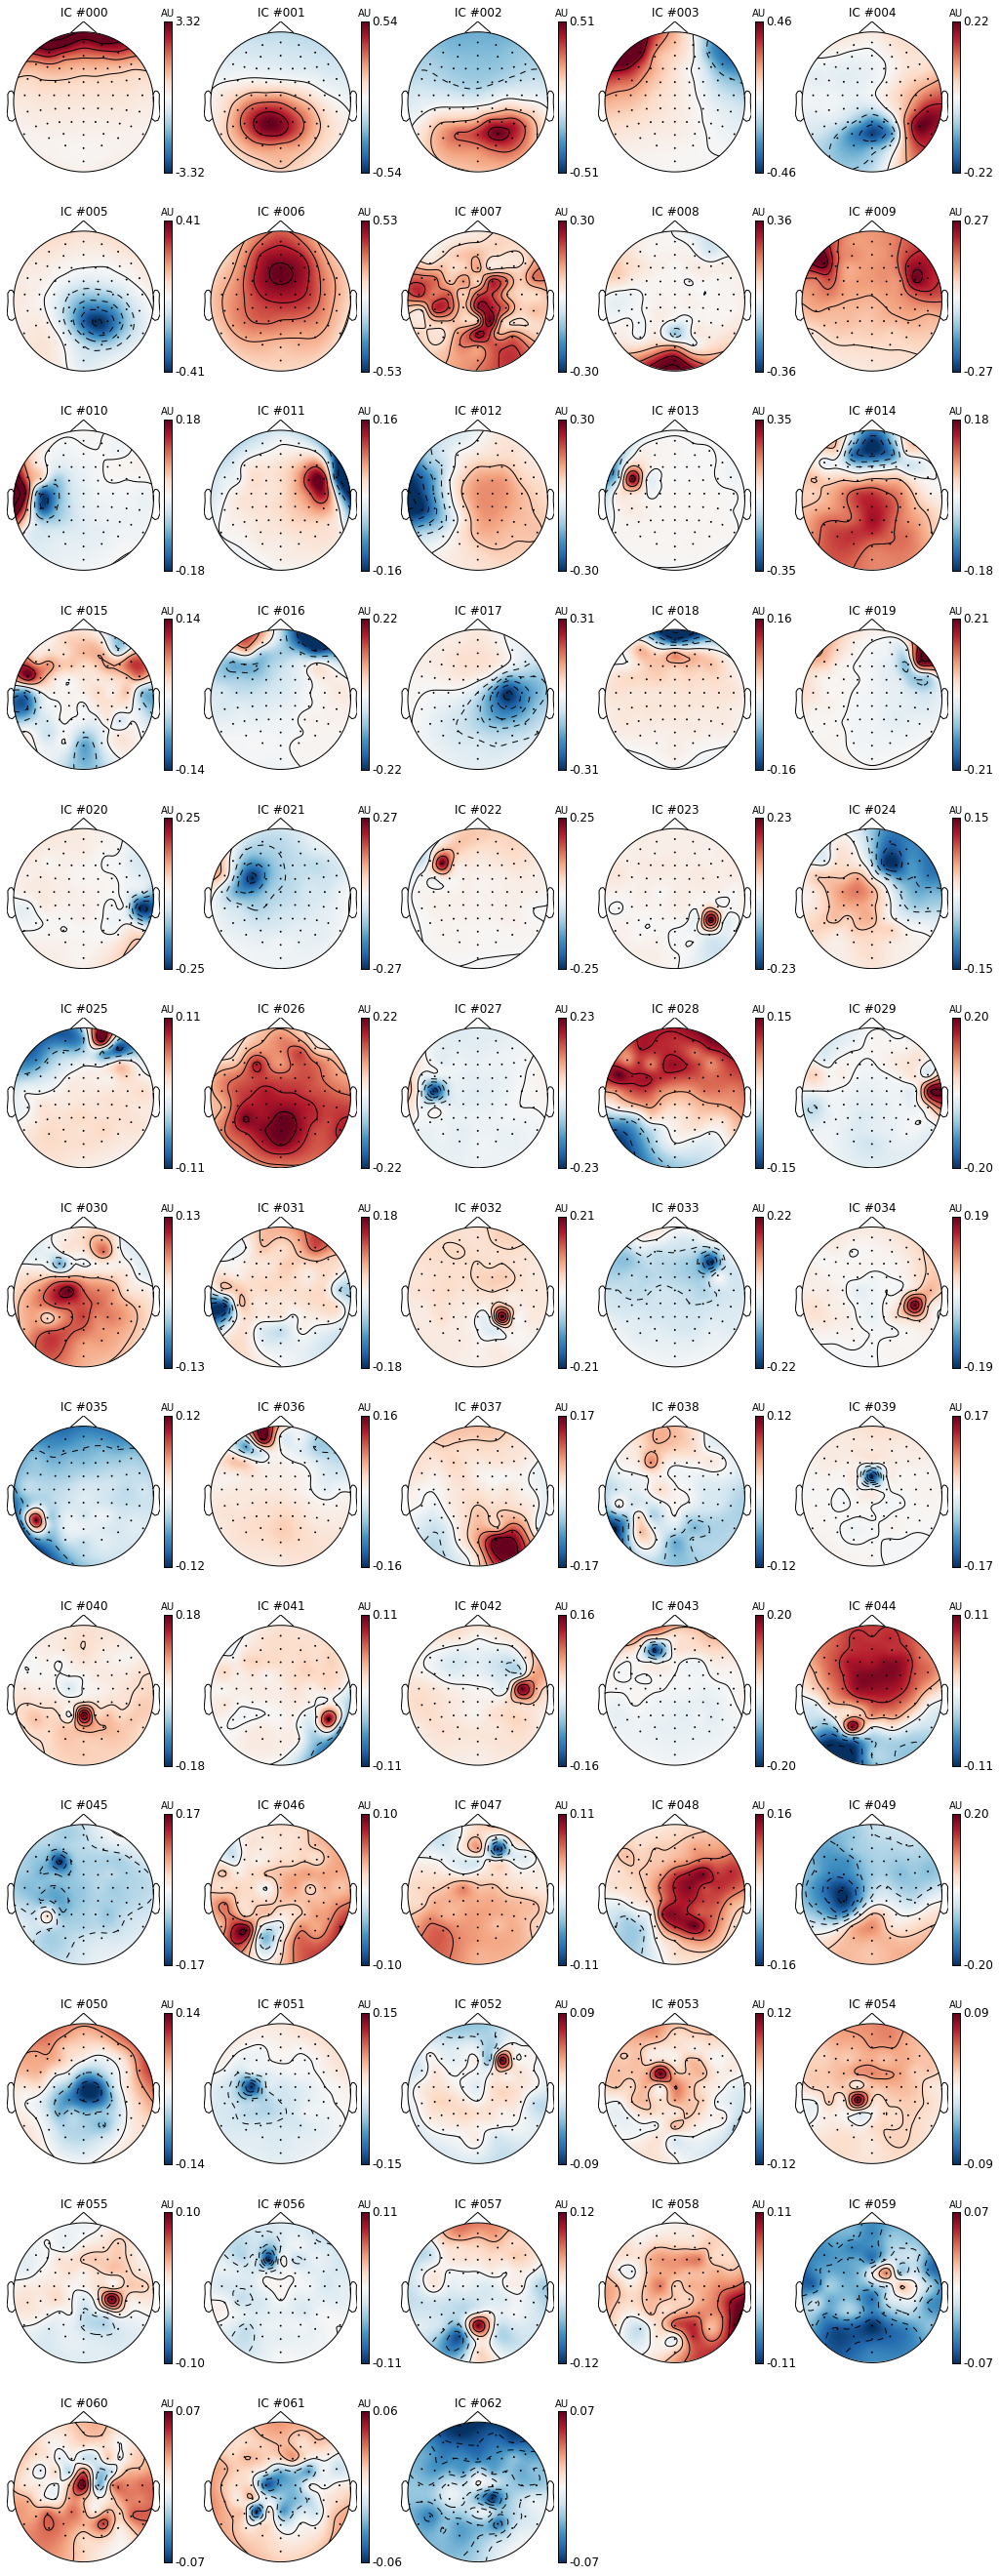

In [26]:
%matplotlib inline
pipeline.plot_ica_components() # static plot

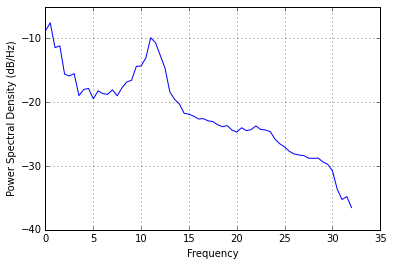

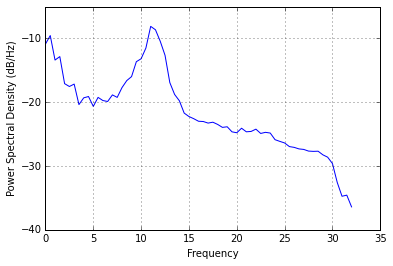

In [28]:
pipeline.inspect_source_psd(1) # plot the PSD of an IC source to look for alpha activity
pipeline.inspect_source_psd(2)

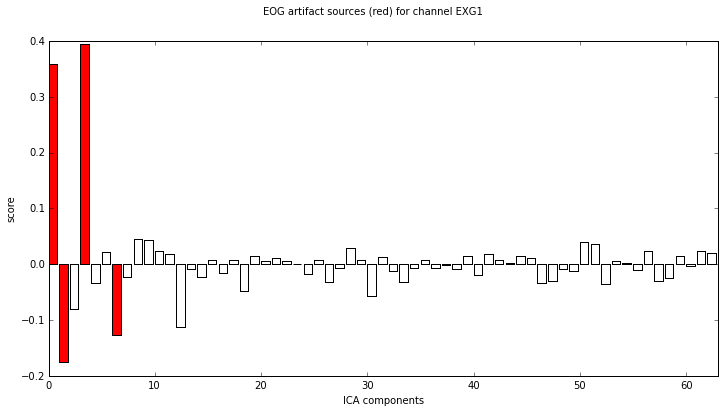

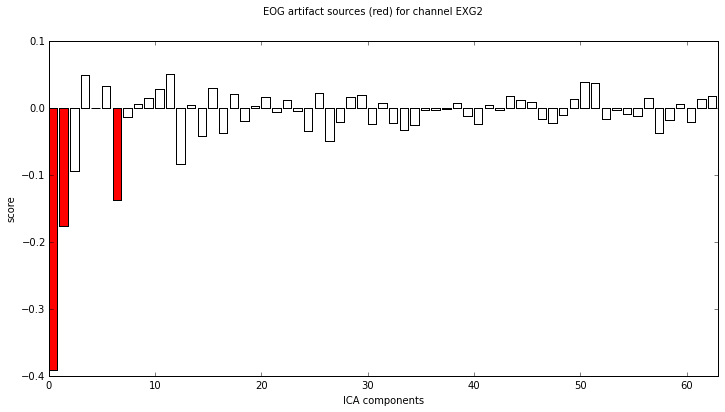

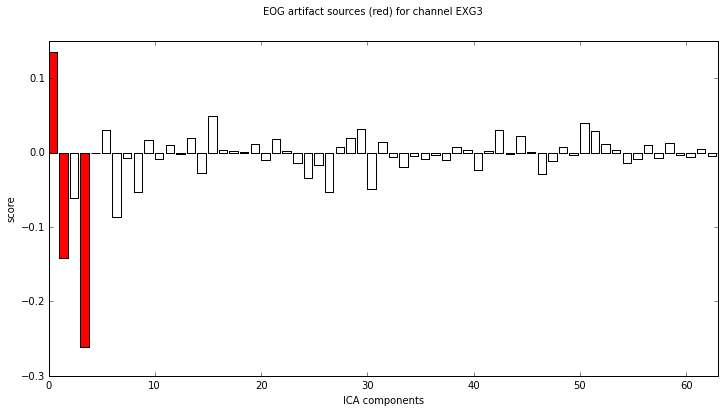

suggested EOG artifact channels:  [0, 1, 3, 6]
EOG artifact component scores:  [ 0.41962239  0.17610312  0.39484017  0.13731637]


In [29]:
pipeline.find_eog_artifact_sources(plot=True, verbose=False)

In [30]:
pipeline.auto_detect_artifact_components()

    Searching for artifacts...
    found 1 artifact by skewness
    found 1 artifact by kurtosis
    found 1 artifact by variance
Artifact indices found:
    18, 8, 6
Ready.
merging [[0, 1, 3, 6], [18, 8, 6]]


suggested channels to reject (selection="auto"):  [0, 1, 3, 6, 8, 18]
To change the component selection, specify select=[...] (component numbers) or select=N (top-N) and run this command again!


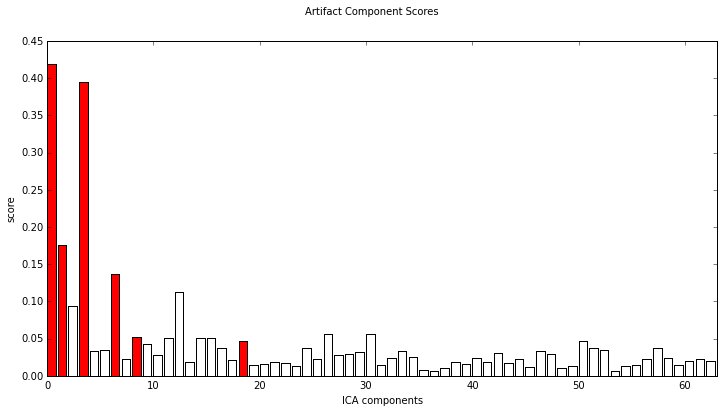

current selection: [0, 1, 3, 6, 8, 18]


In [31]:
pipeline.select_artifact_sources(selection='auto')

In [36]:
pipeline.exclude_ica_components(selection=[0,1,3, 18]) # TODO: adapt selection list
# use cells below to decide, which components to reject, then come back to this cell

excluding ICA components:  [0, 1, 3, 18]


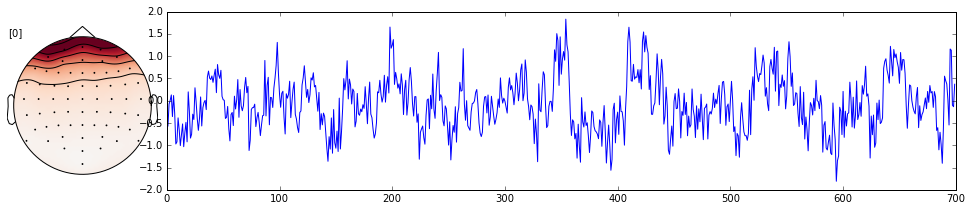

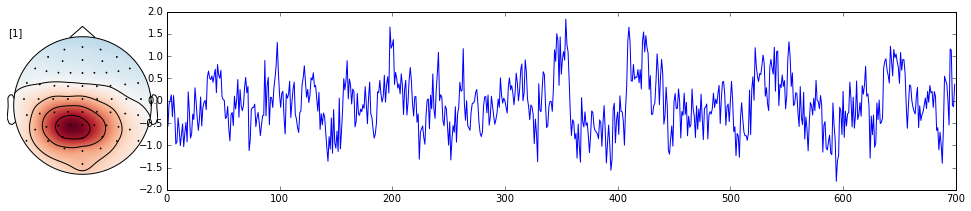

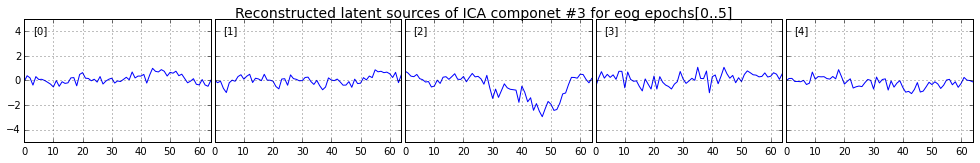

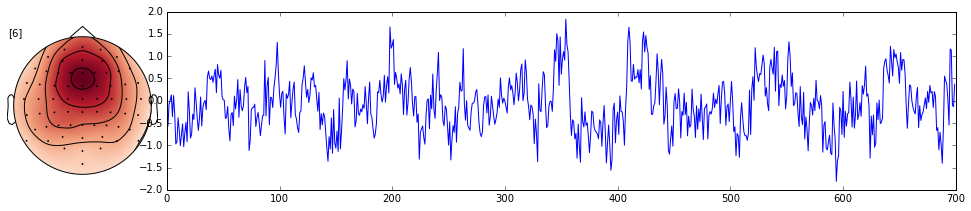

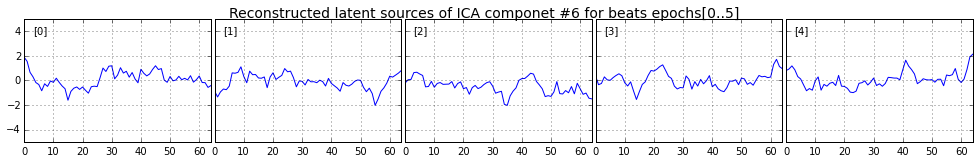

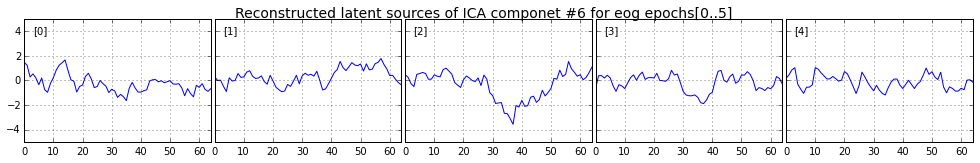

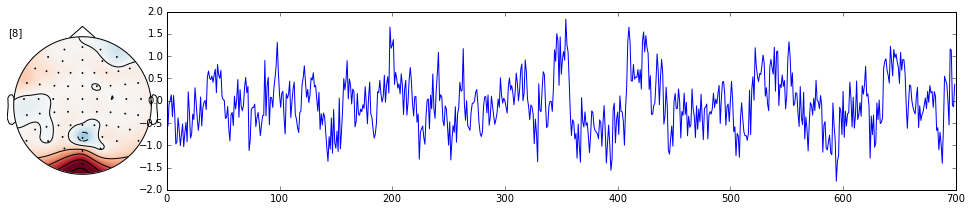

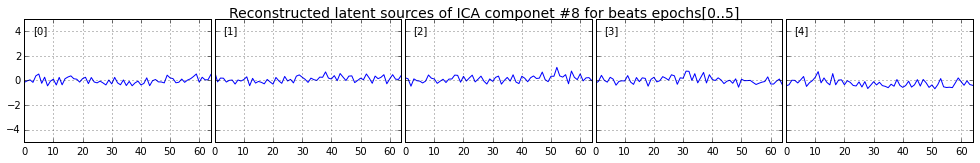

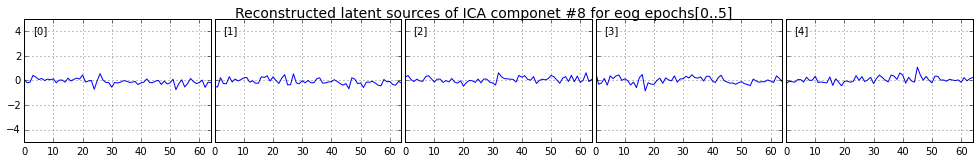

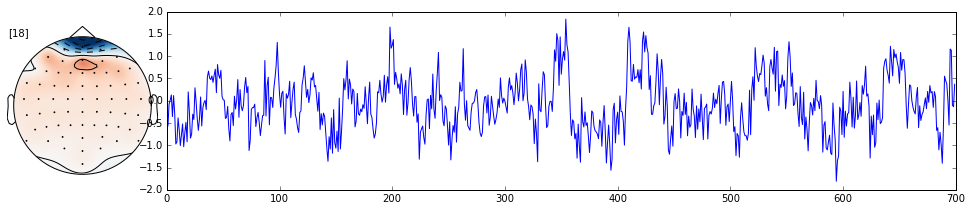

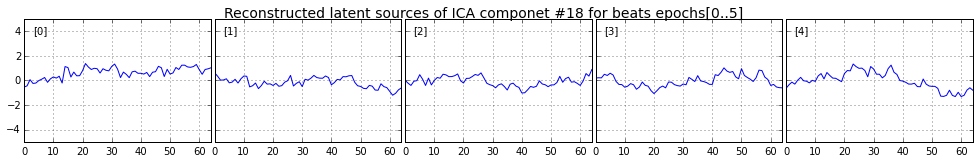

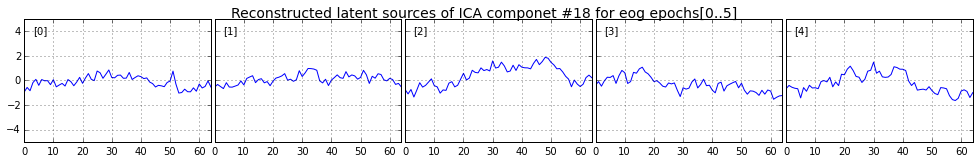

In [32]:
for ic in pipeline.suggested_artifact_components:
# for ic in pipeline.ica.exclude:
    pipeline.inspect_ica_component(ic, [0, 700])
    pipeline.inspect_source_epochs(ic, mode='beats', vmax=5)
    pipeline.inspect_source_epochs(ic, mode='eog', vmax=5)

NOTE: Plotting in non-interactive mode.


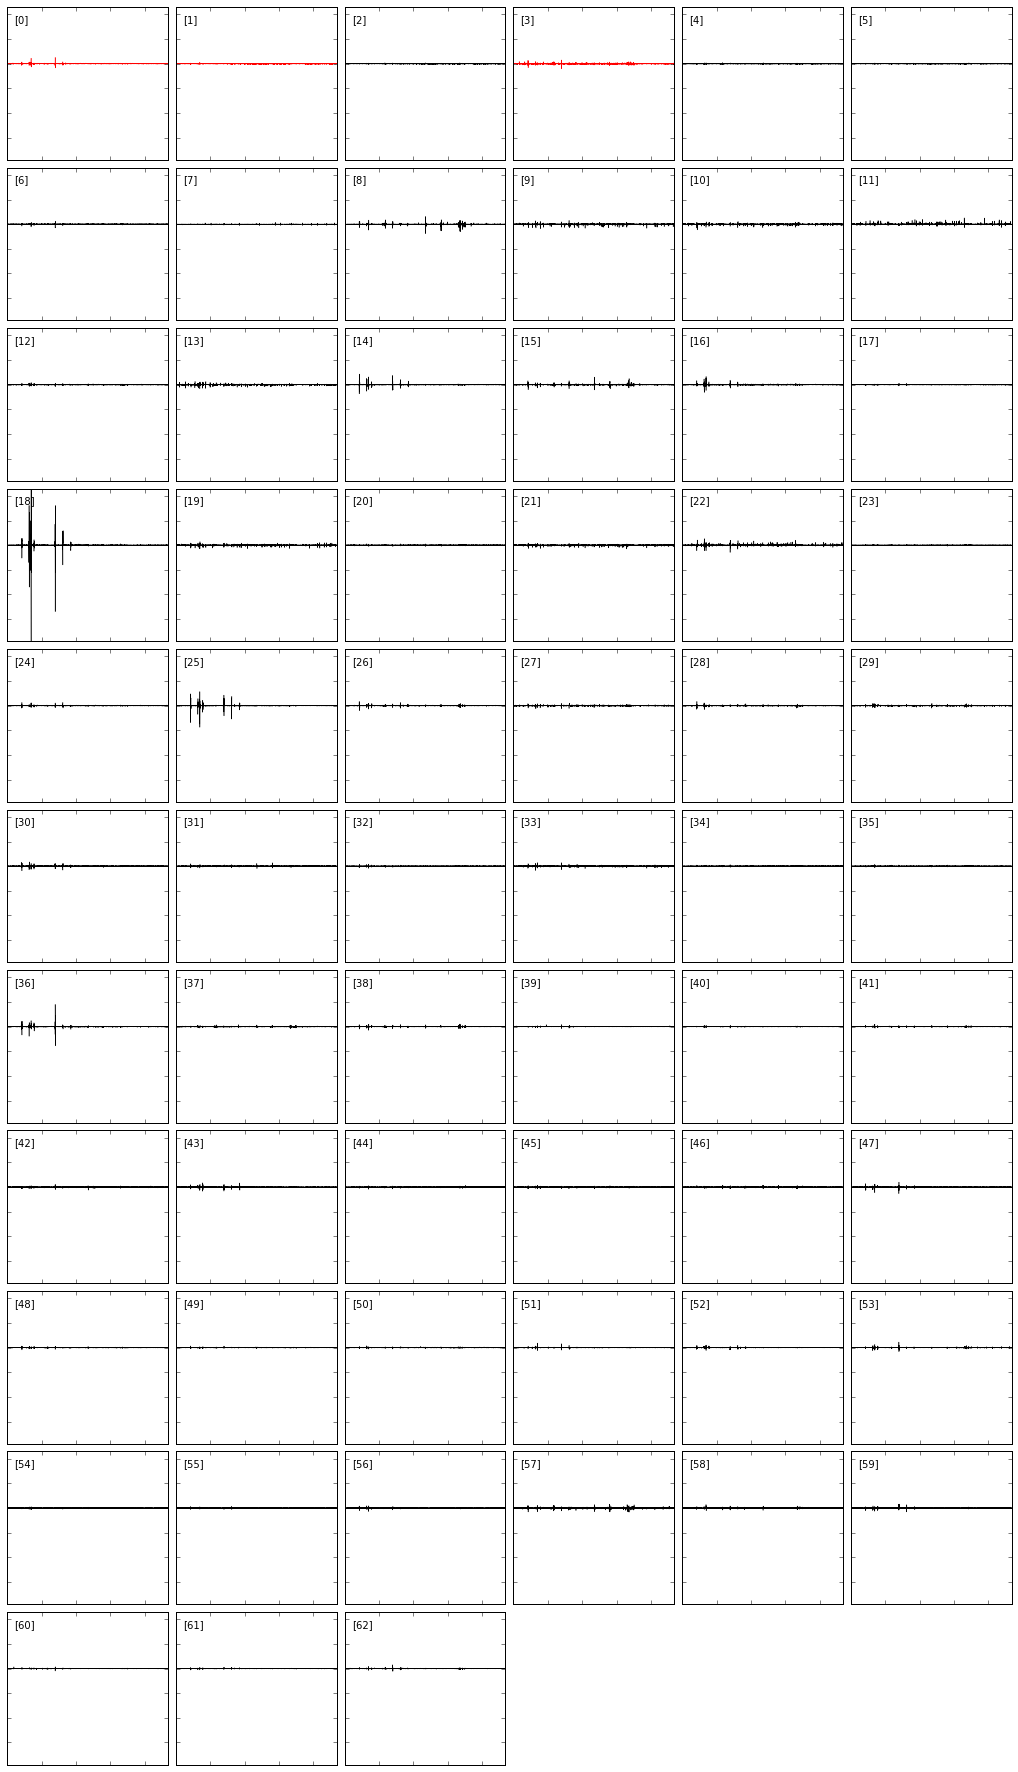

In [34]:
# enable this for interactive mode
# %matplotlib tk

# pipeline.plot_sources(mode='raw')   # this may take a while
# pipeline.plot_sources(mode='beats')
pipeline.plot_sources(mode='eog');

In [58]:
# switch back to non-interactive inline mode
%matplotlib inline

Assess impact on average EOG artifact:


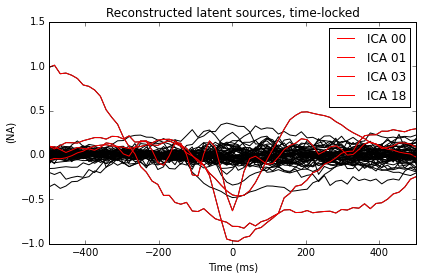

Assess cleaning of EOG epochs:
Transforming to ICA space (63 components)
Zeroing out 4 ICA components
Inverse transforming to PCA space
Reconstructing sensor space signals from 64 PCA components


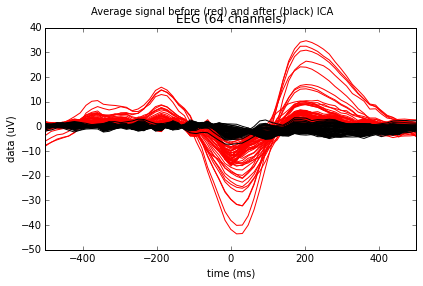

Assess impact on raw. Check the amplitudes do not change:
Transforming to ICA space (63 components)
Zeroing out 4 ICA components
Inverse transforming to PCA space
Reconstructing sensor space signals from 64 PCA components


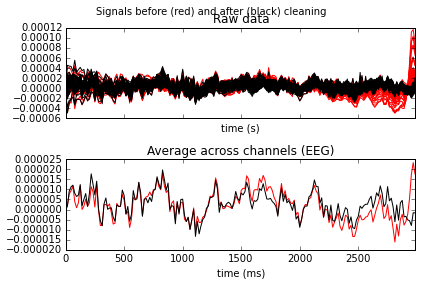

Assess impact on evoked. Check the amplitudes do not change:
Transforming to ICA space (63 components)
Zeroing out 4 ICA components
Inverse transforming to PCA space
Reconstructing sensor space signals from 64 PCA components


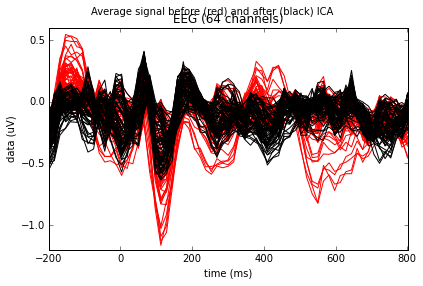

In [37]:
pipeline.assess_unmixing_quality(verbose=False)

In [38]:
pipeline.save_ica('100p_64c') # save for later

Writing ica solution to /imaging/deepthought/datasets/mpi2015/eeg/mne/P09-100p_64c-ica.fif...


# Application Test

In [61]:
pipeline.load_ica('100p_64c')

Reading /imaging/deepthought/datasets/mpi2015/eeg/mne/P09-100p_64c-ica.fif ...
Isotrak not found
Now restoring ICA solution ...
Ready.


In [66]:
raw = pipeline.ica.apply(pipeline.raw, exclude=(pipeline.ica.exclude), copy=False)
if len(raw.info['bads']) > 0:
    raw.interpolate_bads_eeg() # interpolate bad channels afterwards as they are not processed by the ICA

%matplotlib tk 
pipeline.plot_raw();
pass

Transforming to ICA space (64 components)
Zeroing out 5 ICA components
Inverse transforming to PCA space
Reconstructing sensor space signals from 64 PCA components
scroll using cursor keys, click on channels to mark as "bad"
